In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [23]:
random.seed(5)

In [24]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utilities.utils import getDf

In [25]:
plt.figure(figsize=(30, 10))

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

In [26]:
df_augmentation = getDf('../../data/augmentation')
df_no_augmentation = getDf('../../data/no_augmentation')
display(df_augmentation.head(5))
display(df_no_augmentation.head(5))

number_img         disease disease_family healthy  \
Strawberry___healthy          1000         healthy        healthy    True   
Grape___Black_rot             1180       black_rot            rot   False   
Potato___Early_blight         1000    early_blight         blight   False   
Blueberry___healthy           1502         healthy        healthy    True   
Cherry___Powdery_mildew       1052  powdery_mildew         mildew   False   

                             specie  
Strawberry___healthy     strawberry  
Grape___Black_rot             grape  
Potato___Early_blight        potato  
Blueberry___healthy       blueberry  
Cherry___Powdery_mildew      cherry

number_img         disease disease_family healthy  \
Strawberry___healthy           456         healthy        healthy    True   
Grape___Black_rot             1180       black_rot            rot   False   
Potato___Early_blight         1000    early_blight         blight   False   
Blueberry___healthy           1502         healthy        healthy    True   
Cherry___Powdery_mildew       1052  powdery_mildew         mildew   False   

                             specie  
Strawberry___healthy     strawberry  
Grape___Black_rot             grape  
Potato___Early_blight        potato  
Blueberry___healthy       blueberry  
Cherry___Powdery_mildew      cherry

In [44]:
def plot_images_disease(diseases, key):
  base_path = '../../data/augmentation/'

  for disease in diseases:
    dd = df_augmentation.loc[df_augmentation[key] == disease]
    row_len = len(dd)*2
    if row_len > 1:
      col_len = 5
      fig, axes = plt.subplots(row_len, col_len, figsize=(30, 2*row_len))
      fig.suptitle(f'{key.replace("_", " ").capitalize()} {disease}', fontsize=16)

      # get row odd and even to display simultanetly healthy + disease
      row_odd =  [num for num in list(range(row_len)) if num % 2 == 0]
      row_even =  [num for num in list(range(row_len)) if num % 2 != 0]

      indexes = dd.index
      for i in range(len(indexes)):
        disease_dir = indexes[i]
        specie = dd.iloc[i].specie 
        disease_number_file = dd.iloc[i].number_img

        healthy = df_augmentation.loc[(df_augmentation['specie'] == specie) & (df_augmentation['healthy'])]
        if (len(healthy.index) >= 1):
          healthy_dir = healthy.index[0]
          healthy_number_file = healthy.iloc[0].number_img
        else:
          healthy_dir = ''

        for j in range(col_len):
          specie_row_index = row_odd[i]
          healthy_row_index = row_even[i]
          random_num_disease = int(random.randrange(1, disease_number_file))

          # Disease
          curr_img = mpimg.imread(f"{base_path}/{disease_dir}/image ({random_num_disease}).JPG")
          axes[specie_row_index][j].imshow(curr_img)
          axes[specie_row_index][j].grid(None)
          axes[specie_row_index][j].axis('off')

          # Healthy
          if healthy_dir != '':
            random_num_healthy = int(random.randrange(1, healthy_number_file))
            curr_img = mpimg.imread(f"{base_path}/{healthy_dir}/image ({random_num_healthy}).JPG")
            axes[healthy_row_index][j].imshow(curr_img)
            axes[healthy_row_index][j].grid(None)
            axes[healthy_row_index][j].axis('off')
          else:
            axes[healthy_row_index][j].set_visible(False)

          if (j == 0):
            axes[specie_row_index][0].set_title(f"Disease Specie {disease_dir} ({disease_number_file} files)", fontsize=14)
            if healthy_dir != '':
              axes[healthy_row_index][0].set_title(f"Healthy Specie {specie} ({healthy_number_file} files)", fontsize=14)

Text(0.5, 1.0, 'with augmentation')

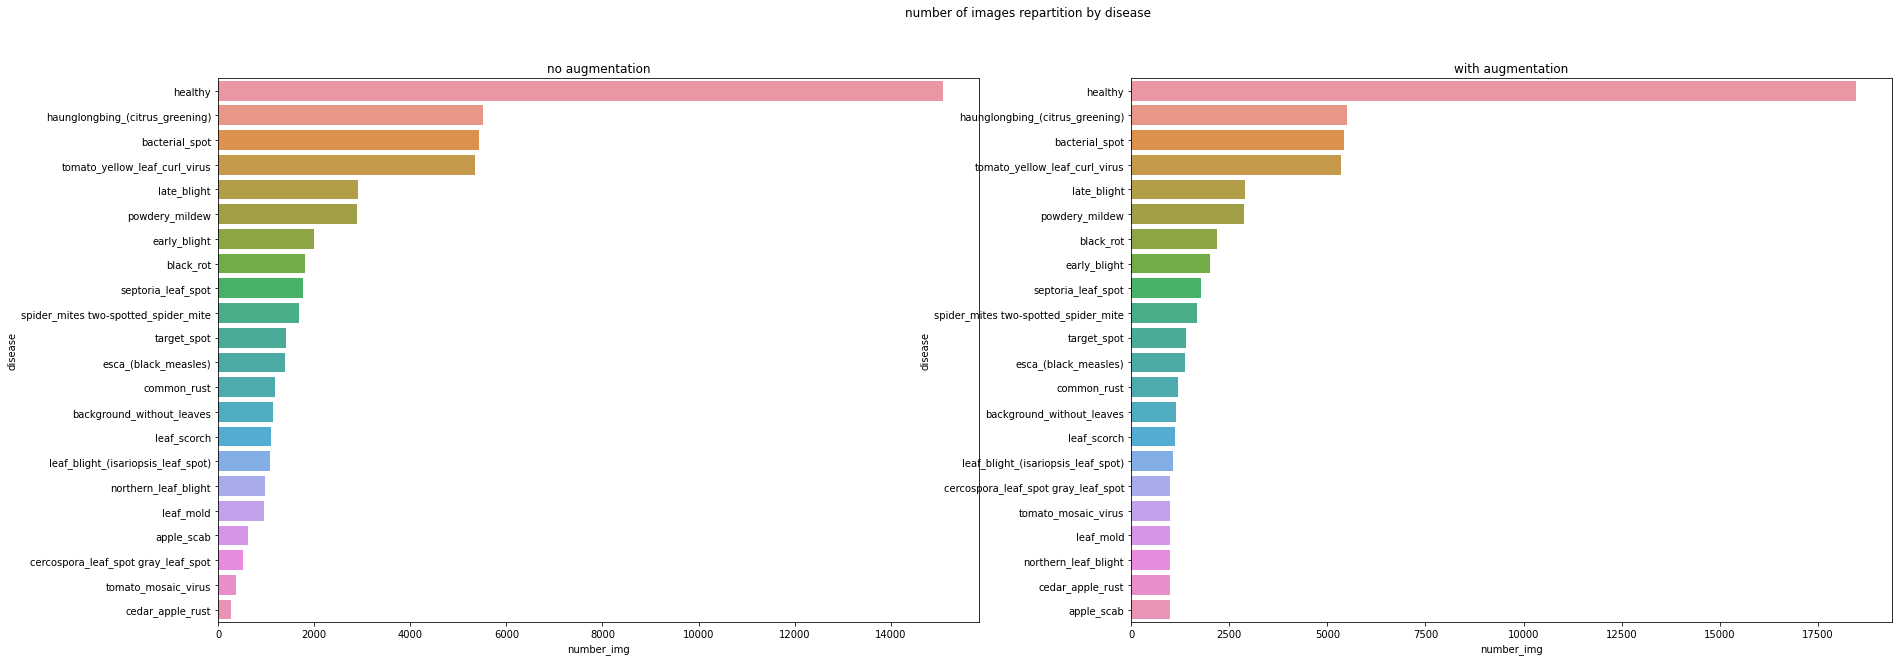

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('number of images repartition by disease')

df_no_augmentation_groupby_disease = df_no_augmentation.groupby(by='disease').sum()
df_no_augmentation_groupby_disease.reset_index(inplace=True)

df_augmentation_groupby_disease = df_augmentation.groupby(by='disease').sum()
df_augmentation_groupby_disease.reset_index(inplace=True)


sns.barplot(ax=axes[0], x="number_img", y="disease", data=df_no_augmentation_groupby_disease, order=df_no_augmentation_groupby_disease.sort_values('number_img', ascending=False).disease)
sns.barplot(ax=axes[1], x="number_img", y="disease", data=df_augmentation_groupby_disease, order=df_augmentation_groupby_disease.sort_values('number_img', ascending=False).disease)

axes[0].set_title('no augmentation')
axes[1].set_title('with augmentation')

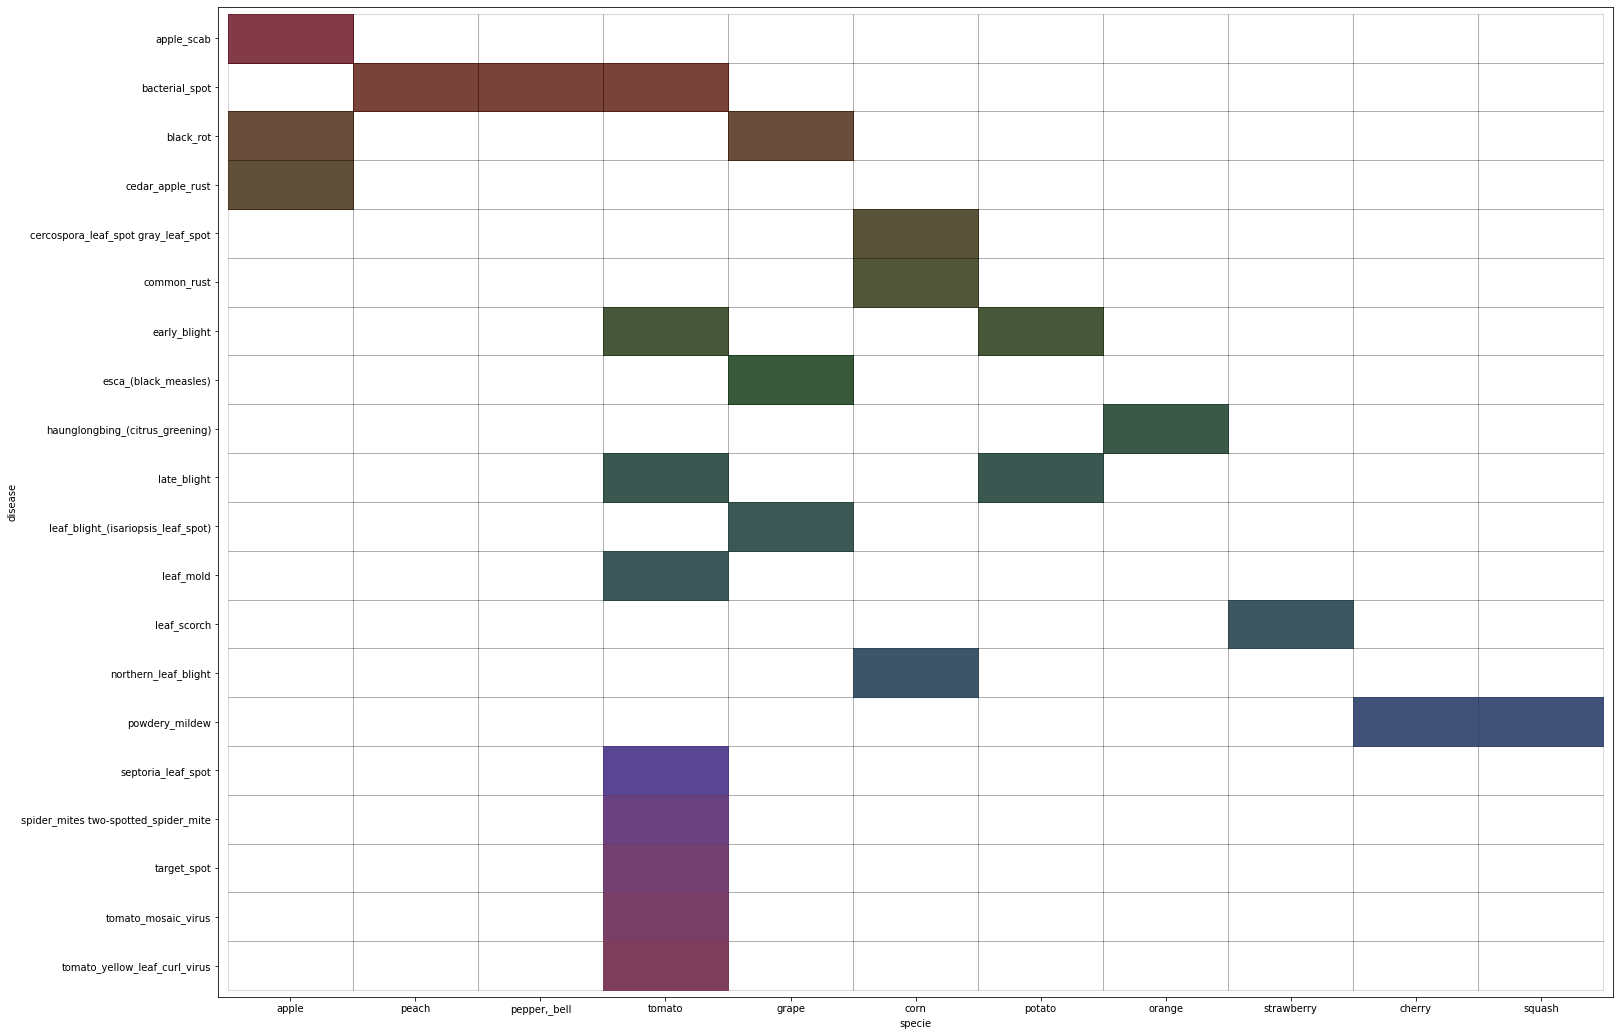

In [29]:
df_no_augmentation_groupby_disease = df_no_augmentation.groupby(by=['disease', 'specie']).sum()
df_no_augmentation_groupby_disease.reset_index(inplace=True)
df_no_augmentation_groupby_disease = df_no_augmentation_groupby_disease[~df_no_augmentation_groupby_disease['healthy']]
df_no_augmentation_groupby_disease = df_no_augmentation_groupby_disease[df_no_augmentation_groupby_disease['disease'] != 'background_without_leaves']

plt.figure(figsize=(25, 10))
plt.subplots_adjust(top=1.5)
ax = sns.histplot(y="disease", x='specie', hue="disease", data=df_no_augmentation_groupby_disease, legend=False, edgecolor="#02080602", linewidth=1)
ax.margins(x=0.007, y=0.007)

See if disease look like same according specie

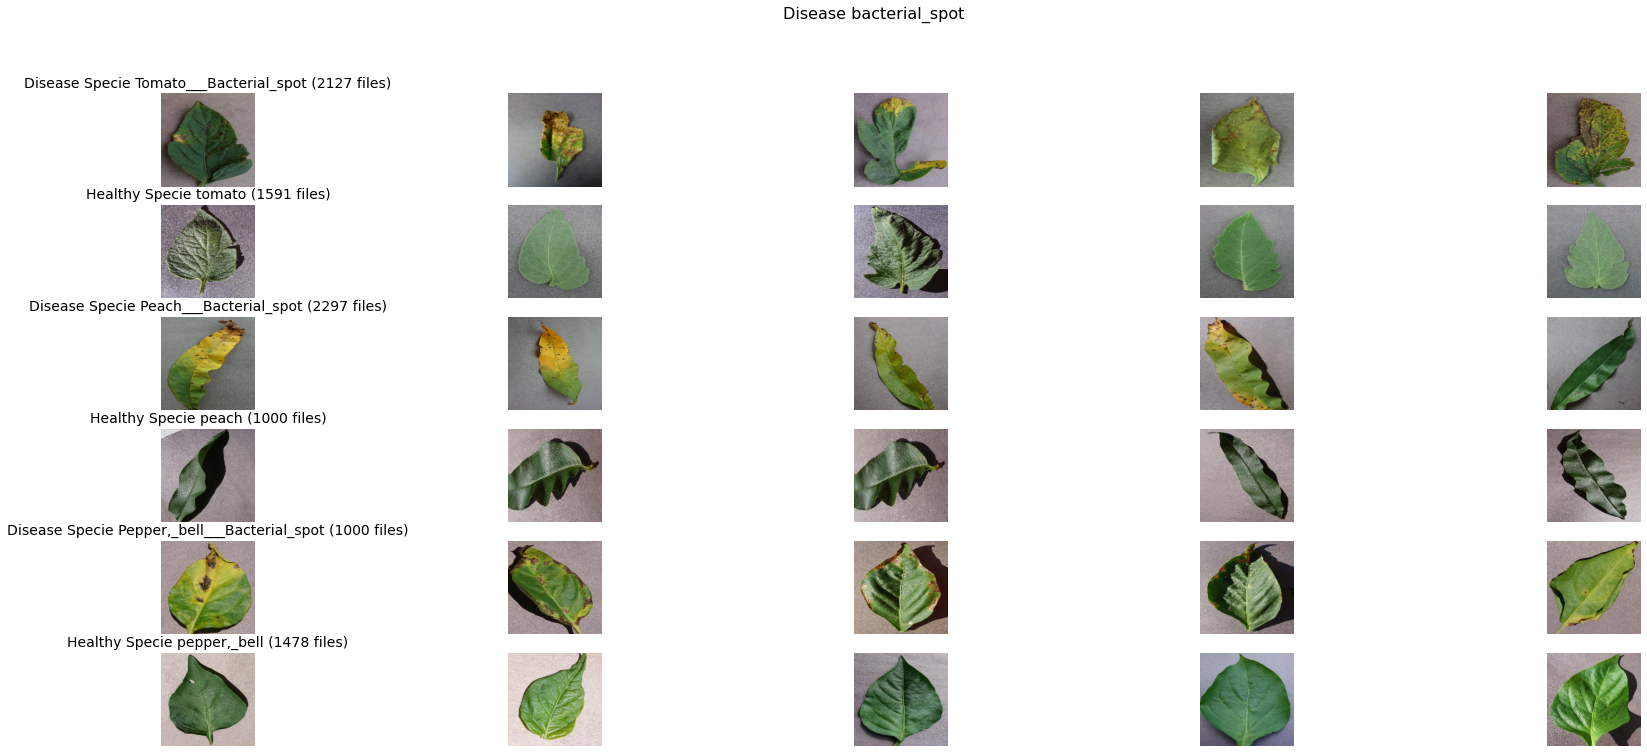

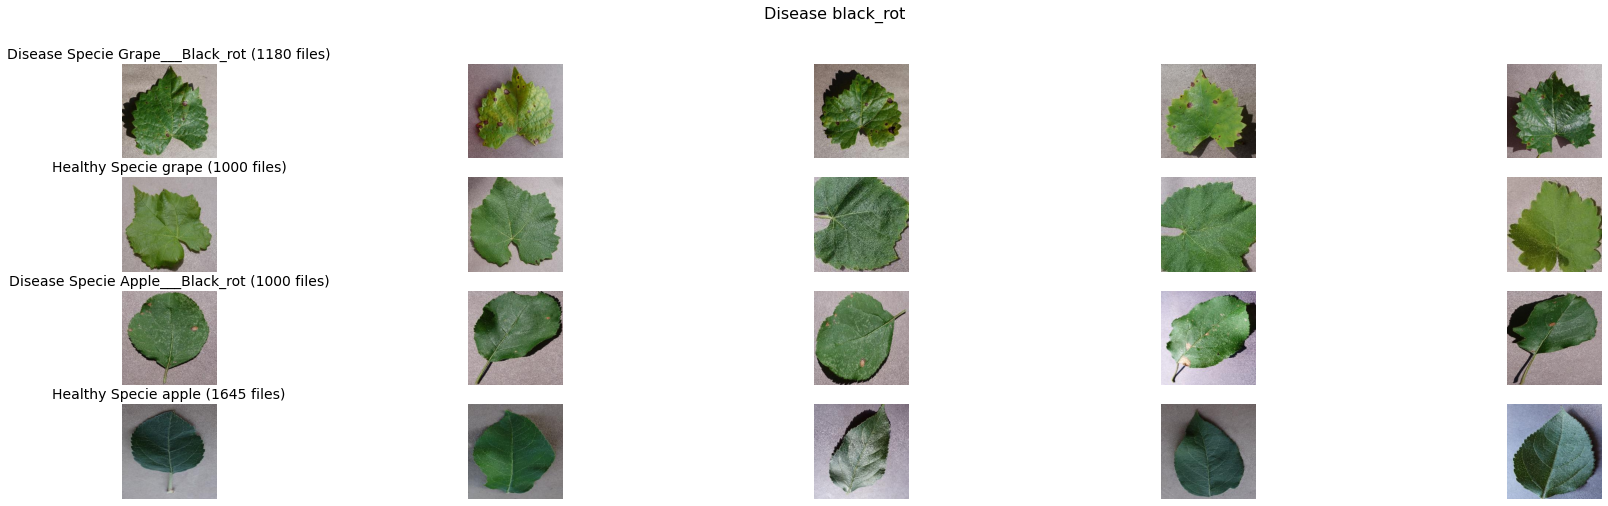

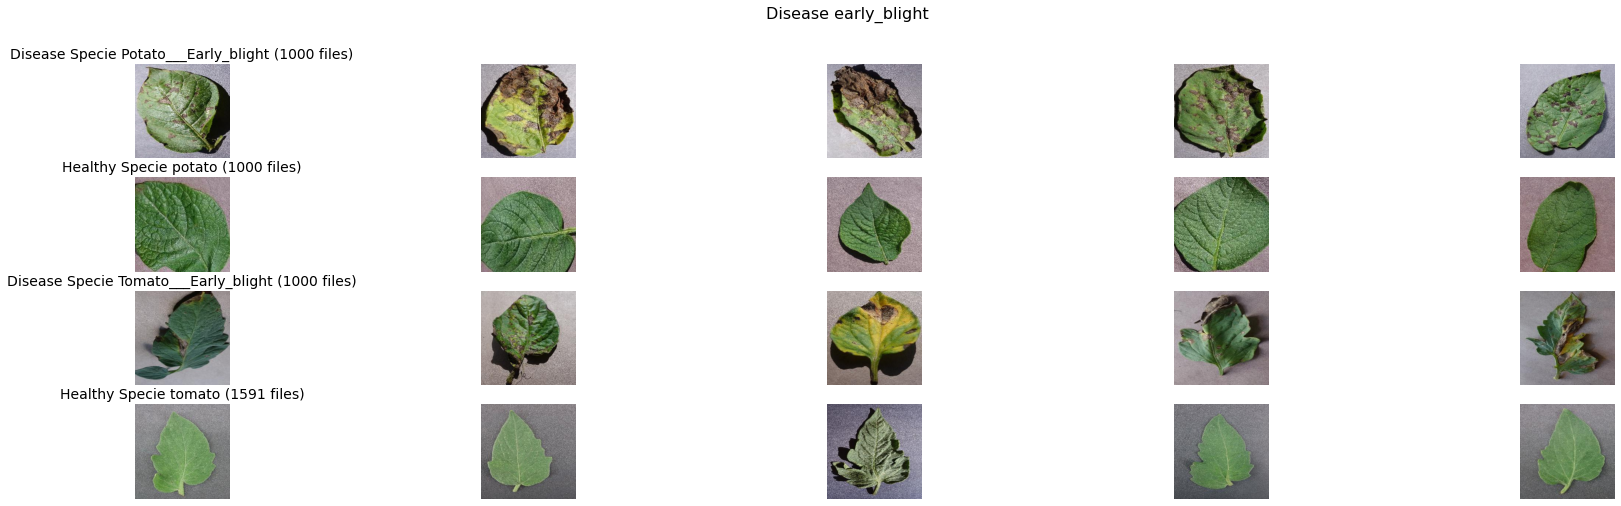

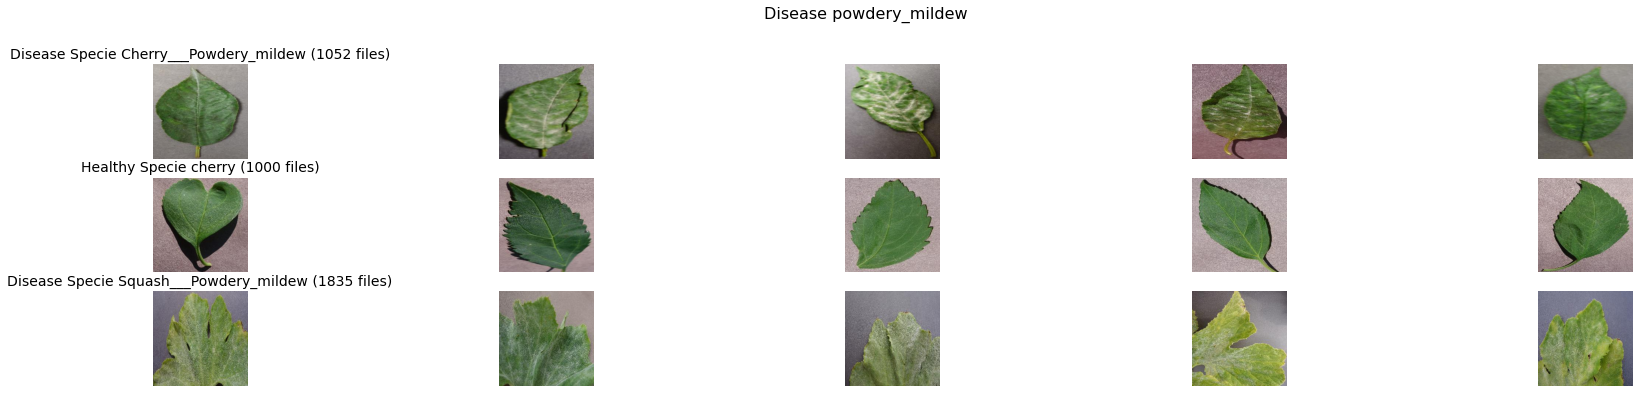

In [42]:
diseases = ['bacterial_spot', 'black_rot', 'early_blight', 'powdery_mildew']
plot_images_disease(diseases, key='disease')

# Disease family

Text(0.5, 1.0, 'with augmentation')

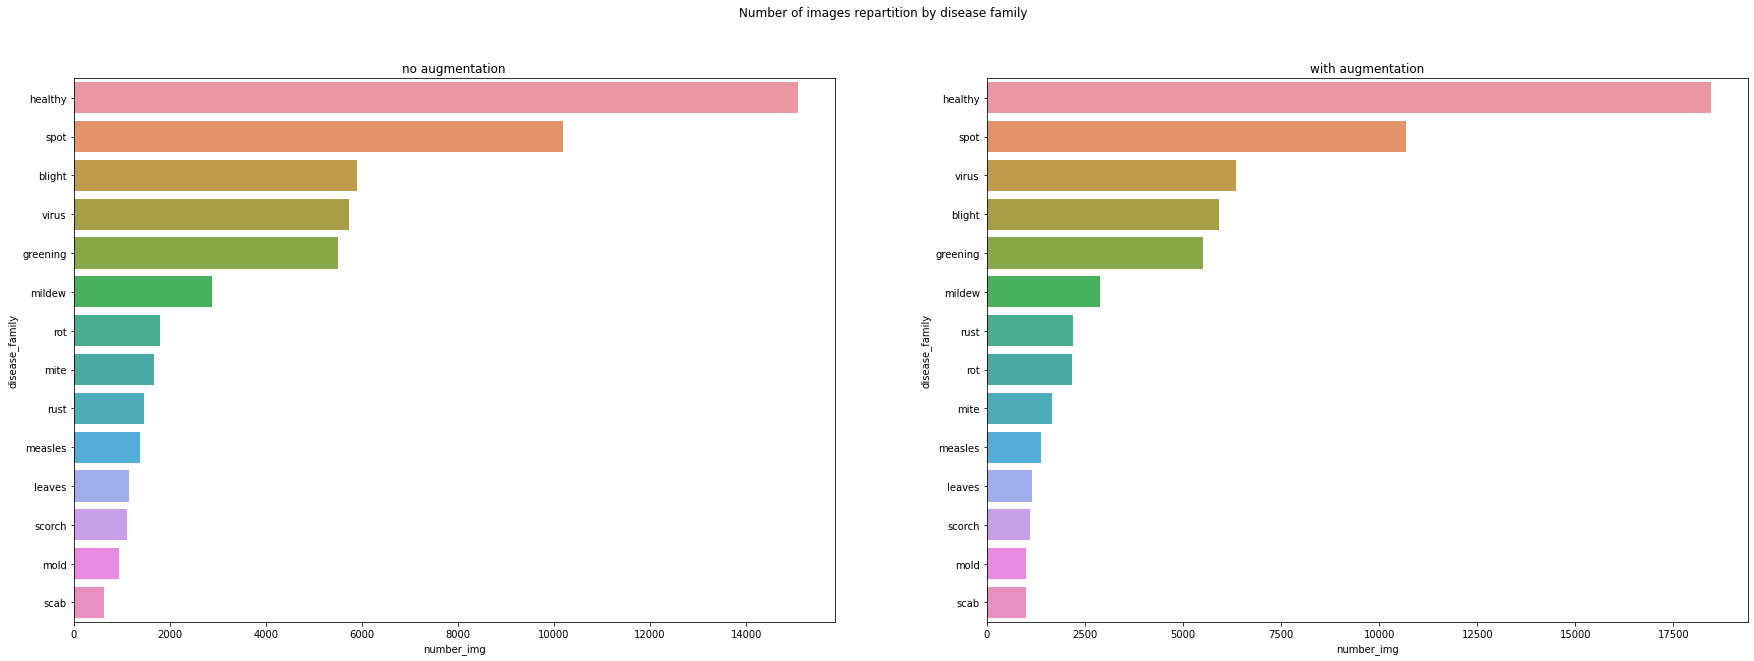

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Number of images repartition by disease family')

df_no_augmentation_groupby_disease = df_no_augmentation.groupby(by='disease_family').sum()
df_no_augmentation_groupby_disease.reset_index(inplace=True)

df_augmentation_groupby_disease = df_augmentation.groupby(by='disease_family').sum()
df_augmentation_groupby_disease.reset_index(inplace=True)


sns.barplot(ax=axes[0], x="number_img", y="disease_family", data=df_no_augmentation_groupby_disease, order=df_no_augmentation_groupby_disease.sort_values('number_img', ascending=False).disease_family)
sns.barplot(ax=axes[1], x="number_img", y="disease_family", data=df_augmentation_groupby_disease, order=df_augmentation_groupby_disease.sort_values('number_img', ascending=False).disease_family)

axes[0].set_title('no augmentation')
axes[1].set_title('with augmentation')

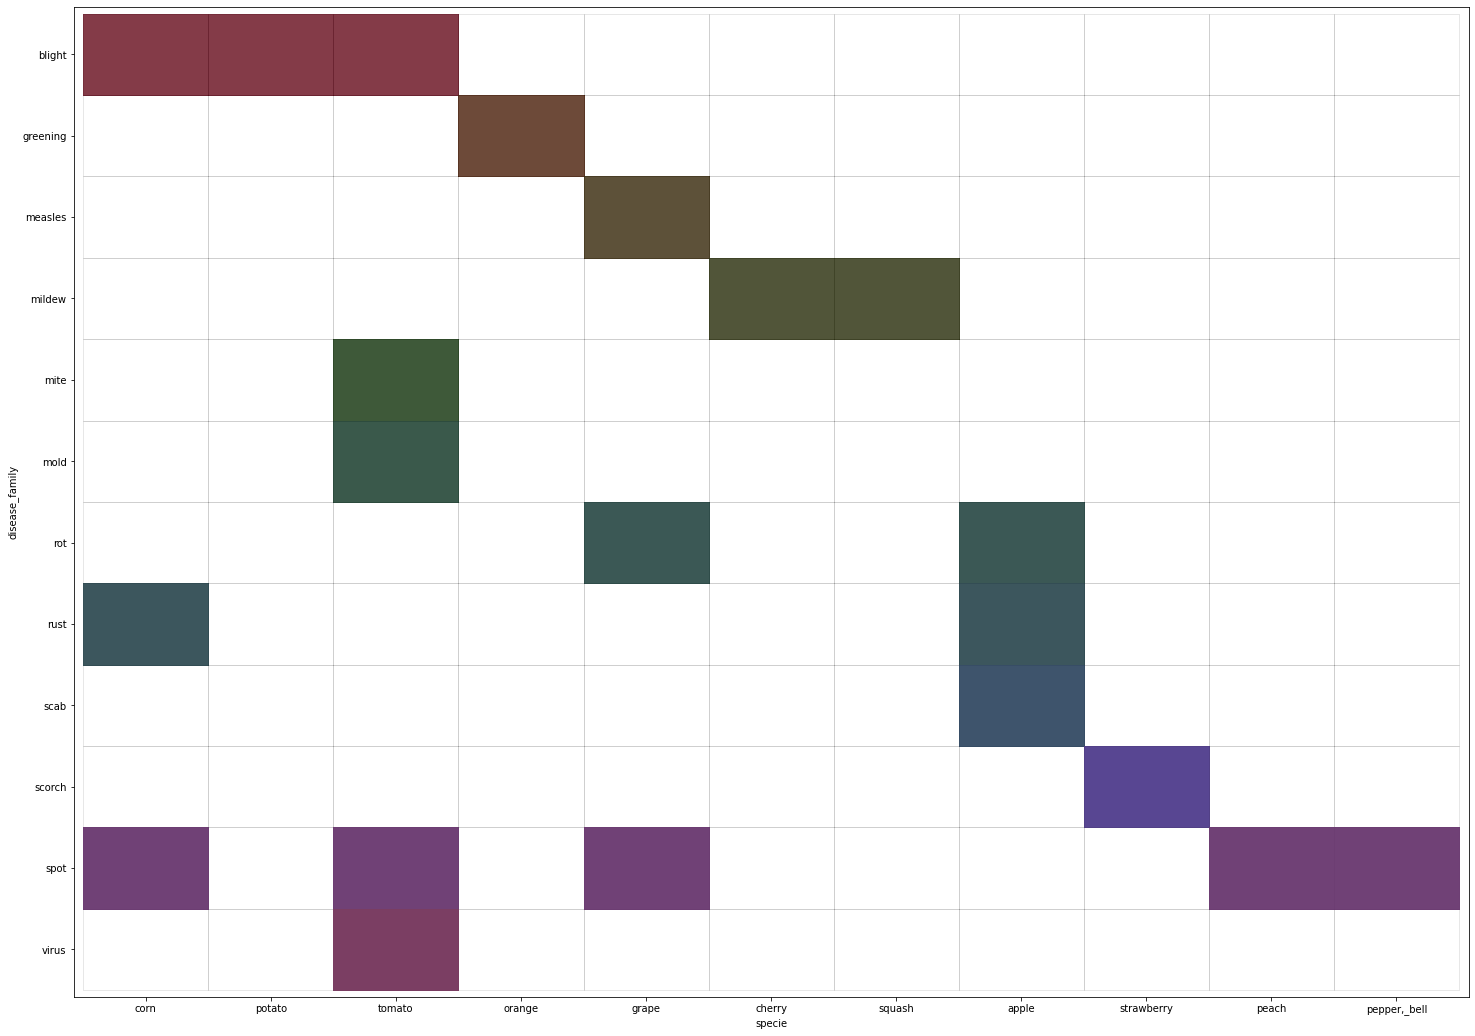

In [32]:
df_no_augmentation_groupby_disease_fam = df_no_augmentation.groupby(by=['disease_family', 'specie']).sum()
df_no_augmentation_groupby_disease_fam.reset_index(inplace=True)
df_no_augmentation_groupby_disease_fam.healthy = df_no_augmentation_groupby_disease_fam.healthy.astype(bool)
df_no_augmentation_groupby_disease_fam = df_no_augmentation_groupby_disease_fam[~df_no_augmentation_groupby_disease_fam['healthy']]
df_no_augmentation_groupby_disease_fam = df_no_augmentation_groupby_disease_fam[df_no_augmentation_groupby_disease_fam['disease'] != 'background_without_leaves']

plt.figure(figsize=(25, 10))
plt.subplots_adjust(top=1.5)
ax = sns.histplot(y="disease_family", x='specie', hue="disease_family", data=df_no_augmentation_groupby_disease_fam, legend=False, edgecolor="#02080602", linewidth=1)
ax.margins(x=0.007, y=0.007)

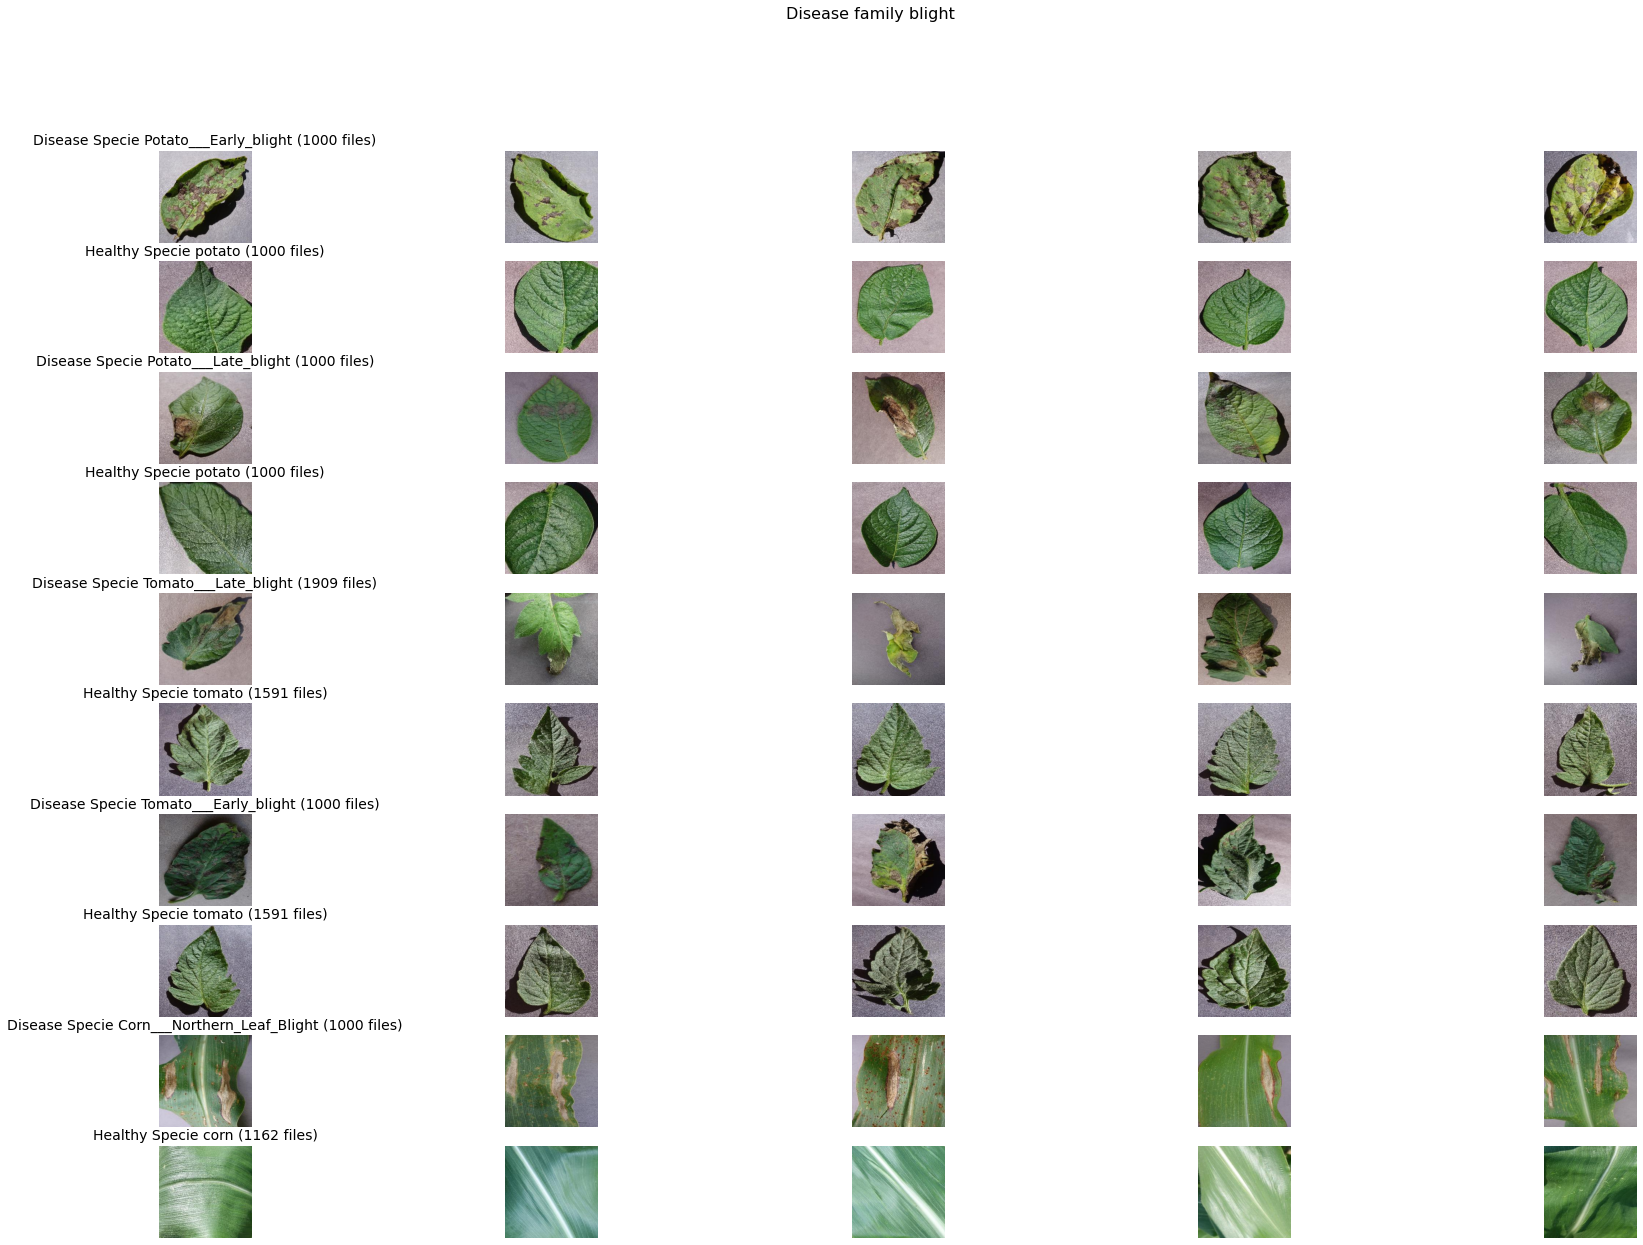

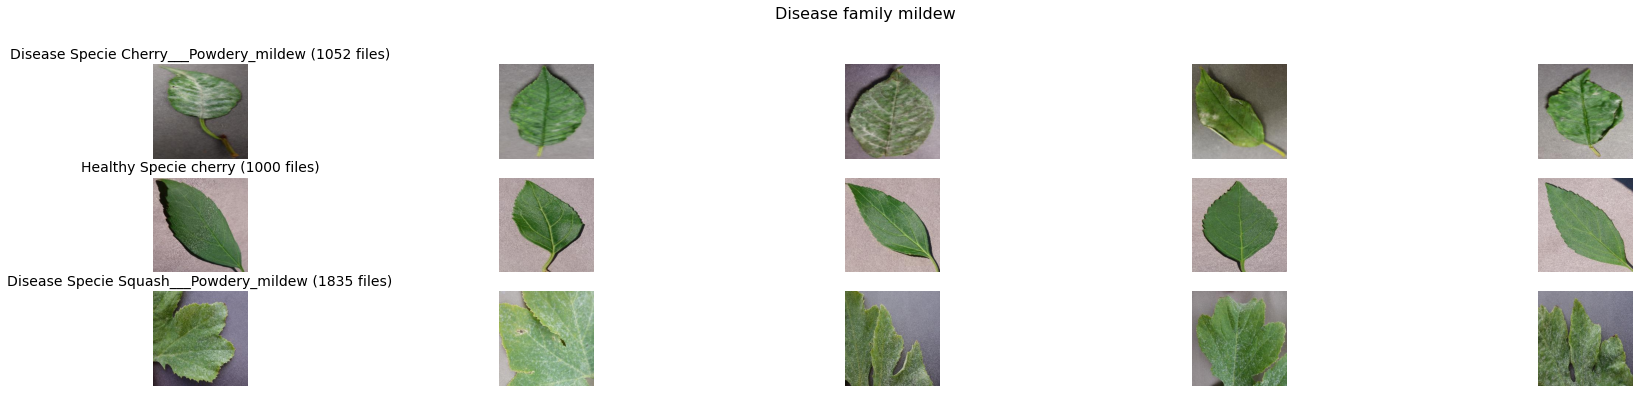

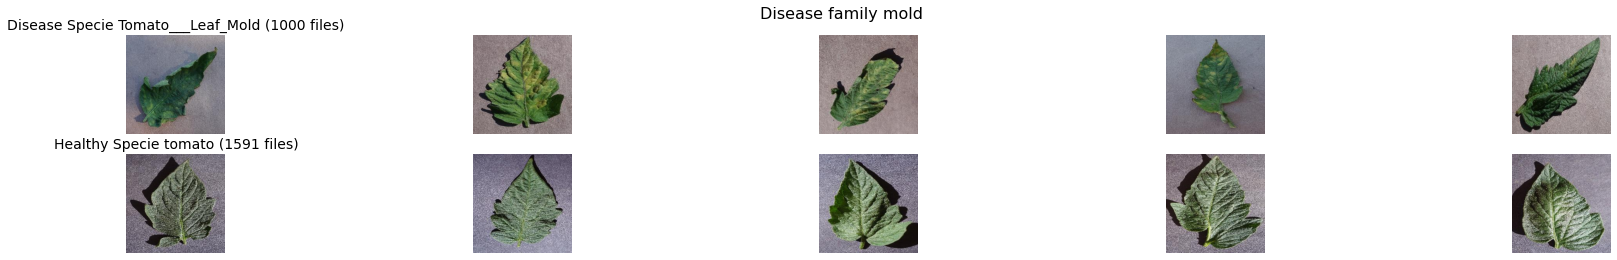

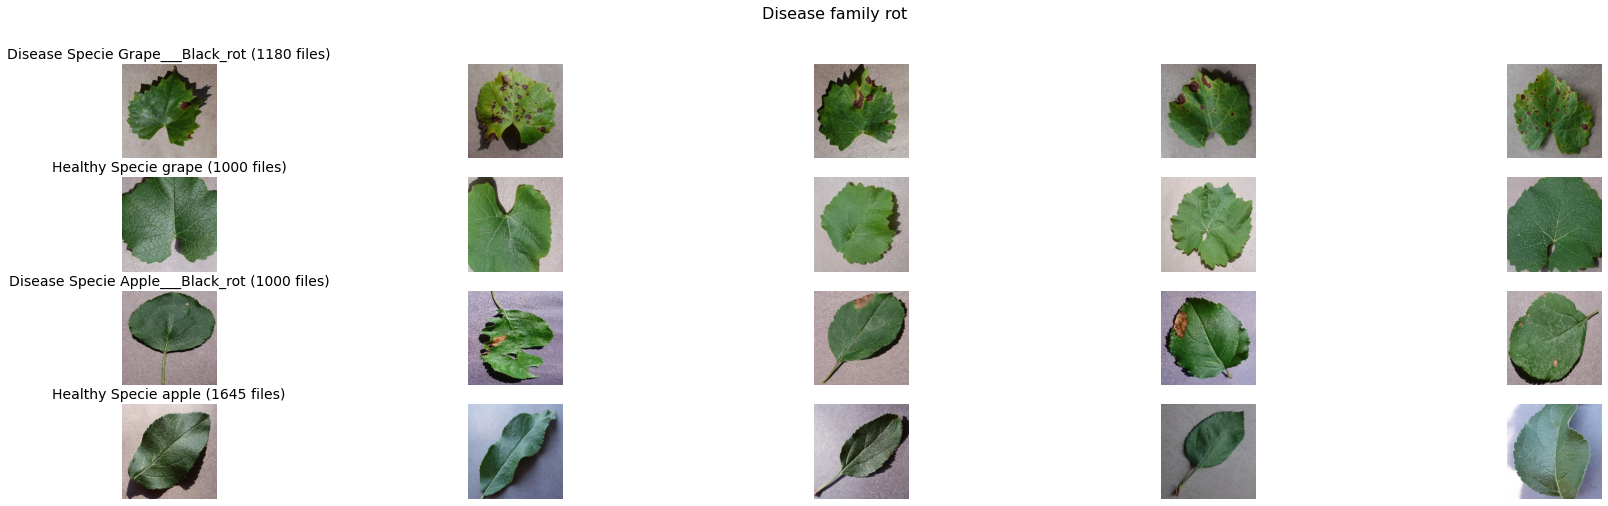

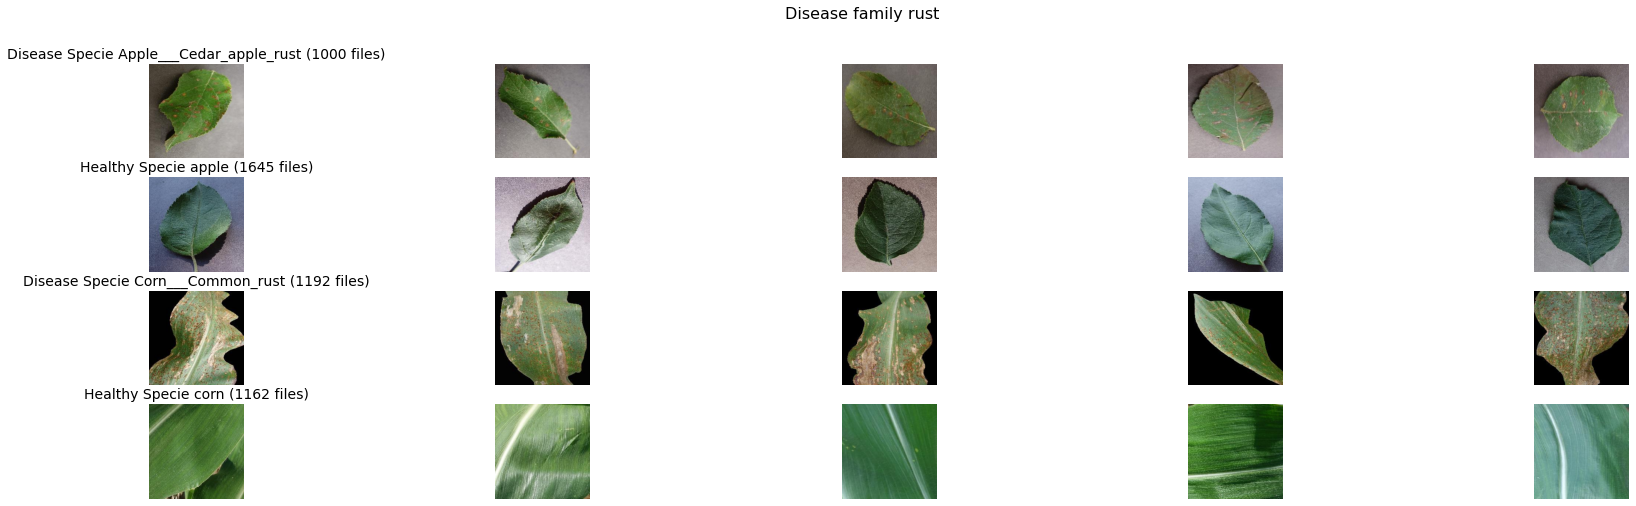

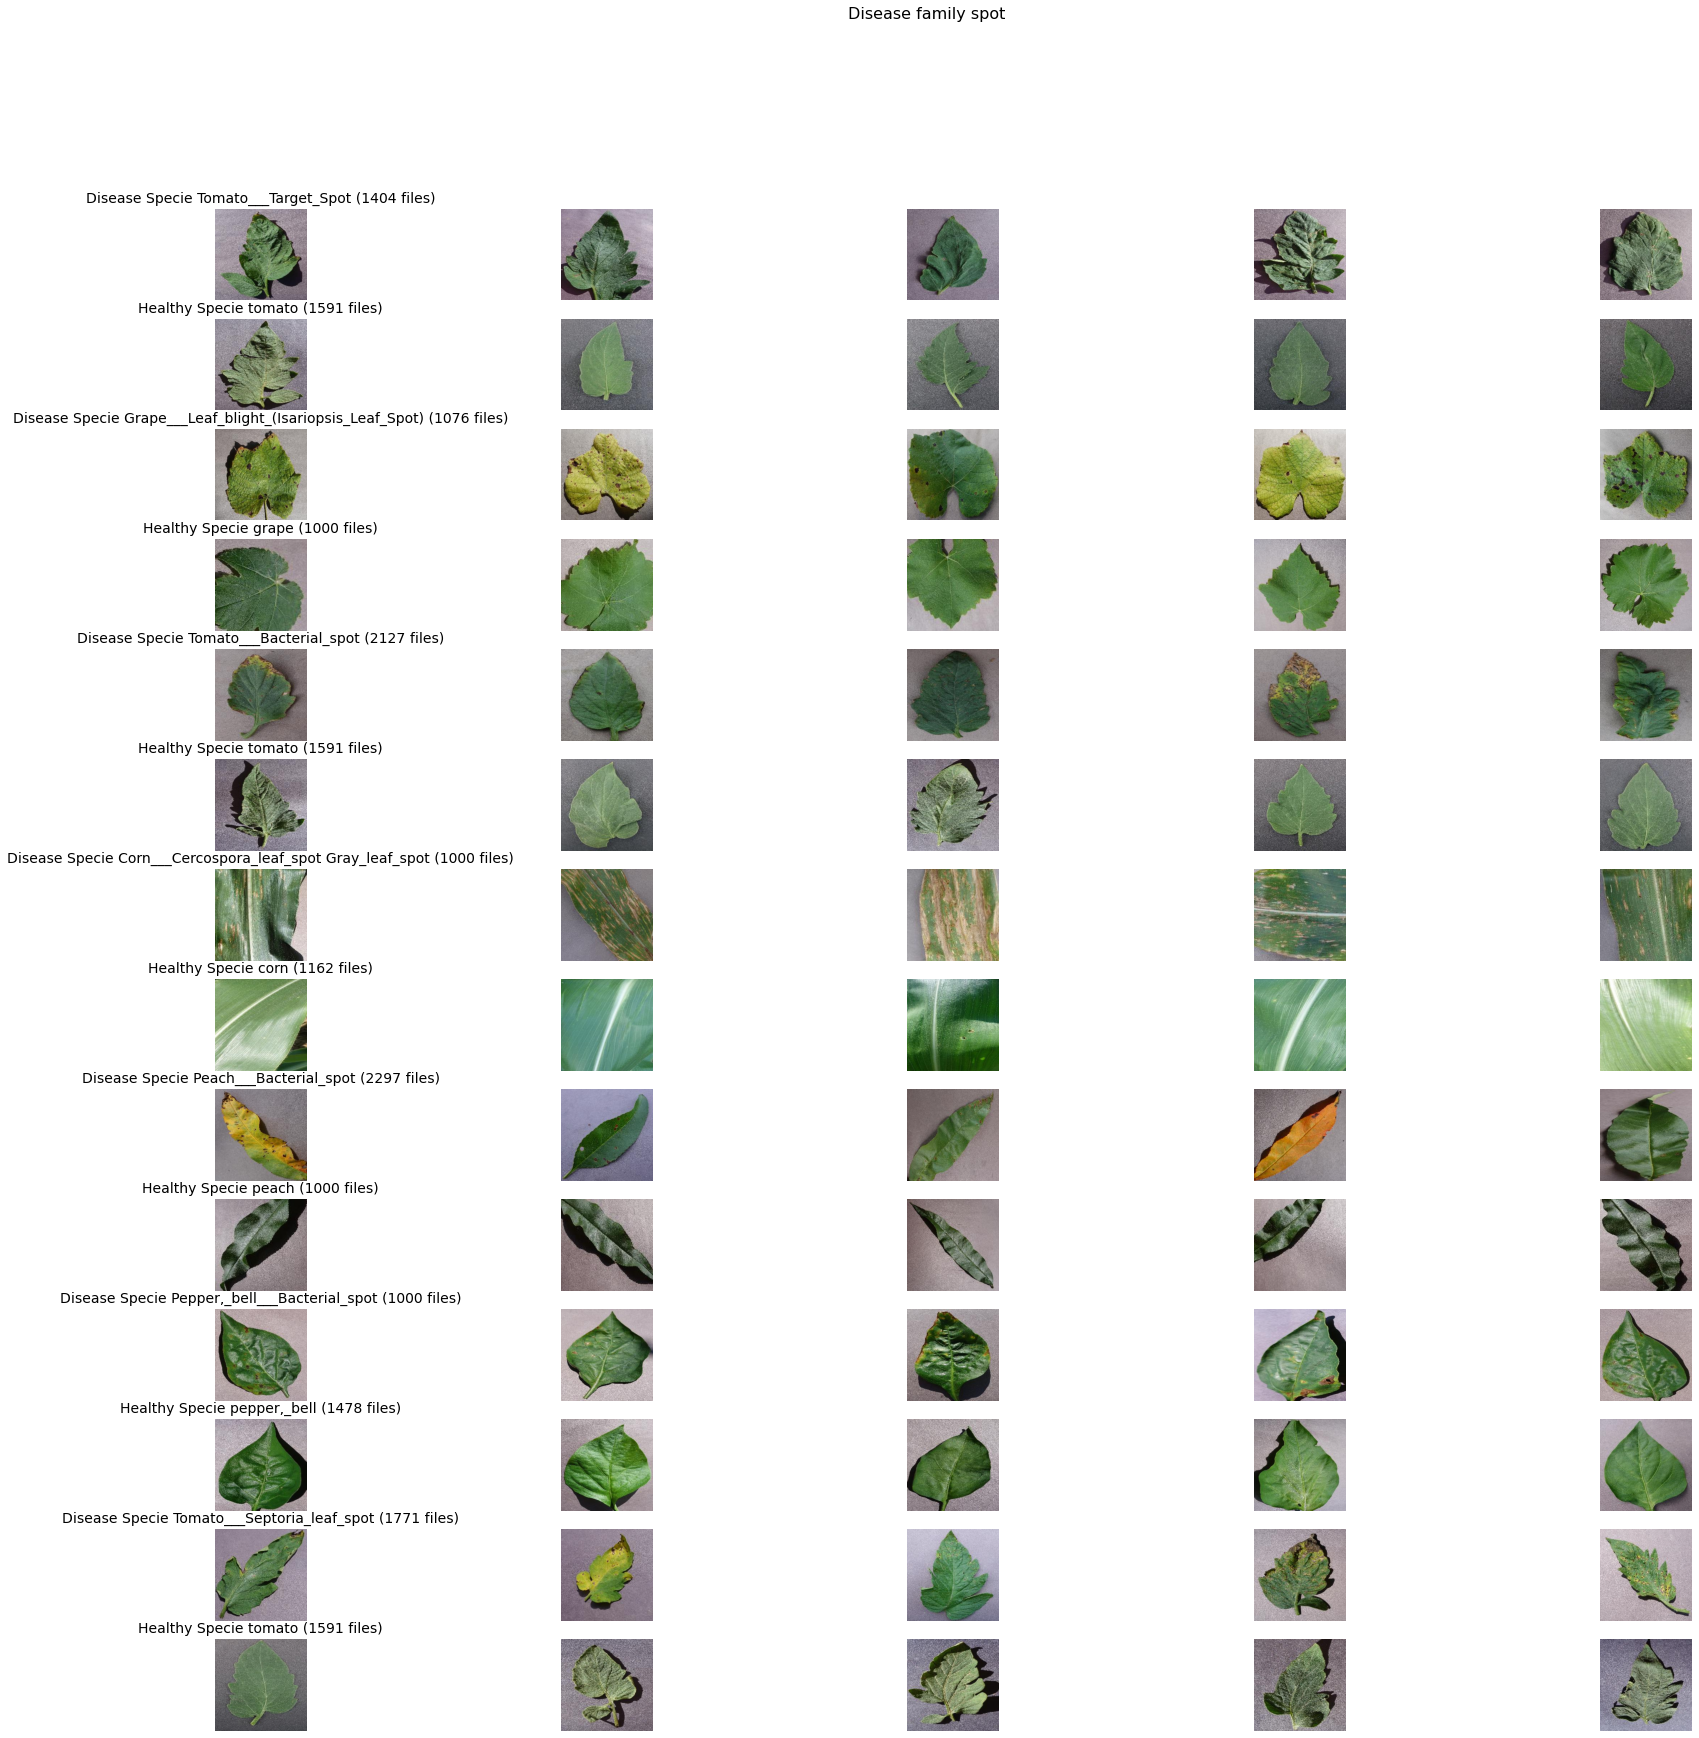

In [45]:
diseases_family = ['blight', 'mildew', 'mold', 'rot', 'rust', 'spot']
plot_images_disease(diseases_family, key='disease_family')